<h1>Excel to Python</h1>
<h2>A Brief Guide to How and Why</h2>

### Quick Biography

<b>Name:</b> Fady Megally  
<b>Birthday :</b> June 21st  
<b>Occupation:</b> Engineer at Caterpillar Inc.  
<b>Technical Background:</b>  
<ul>
<li>BSc in Mechanical Engineering</li>
<li>Experience in internal combustion engines design, simulation product life cycle management.</li>
</ul>

### Why Use Python Instead of Excel ?

<ul>
<li>Mainly to automate repeating tasks that would either be done manualy or using VBA macros</li>
<li>If you for some reason hate Microsoft</li>
<li>Don't want to pay for MS Office</li>
<li>It's the path less chosen</li>
<li>All of the above</li>

<table>
<tr>
<th>Pros</th>
<th>Cons</th>
</tr>
<tr>
<td>Would make your life easier if you have to repeat the same process again and again</td>
<td>Not for simple and short Excel tasks. Only pays-off for tasks above a certain size and complexity</td>
</tr>
<tr>
<td>Whatever the script does is self-documenting. In excel the user has to remember to follow the same steps.</td>
<td>Some features that are one click of a button in excel could require a significant amount of lines to implement</td>
</tr>
<tr>
<td>More useful and portable than VBA. Learn one language to do many things.</td>
<td>Prone to hidden bugs not always detectable right away.</td>
</tr>
<tr>
<td>Can do some things Excel can’t do</td>
<td>There is a learning curve</td>
</tr>
<tr>
<td>Open-source and free (as in free beer)</td>
<td>No pretty formatting without extra coding/libraries</td>
</tr>

    

### What you'll need..most of the time

<b>pandas</b> : <em>Data analysis library that provides DataFrame objects, a data structure which resembles an Excel worksheet.</em>  
<b>matplotlib</b> : <em>Ploting and data visualization library</em>  
<b>pyodbc</b> : <em>A library that provides ODBC features ( connecting to, and querying databases)</em>

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc as db
import numpy as np

###  Database Queries 

In [53]:
cnxn = db.connect("DSN=server_name;UID=userid;PWD=password")
sql_query = "SELECT * FROM table1"
data = pd.read_sql(sql_query,cnxn)

Error: ('IM002', '[IM002] [Microsoft][ODBC Driver Manager] Data source name not found and no default driver specified (0) (SQLDriverConnect)')

### Reading Data from Files

In [ ]:
data = pd.read_csv('GenericSalesData.csv')


In [ ]:
data.tail()

### Selecting & Indexing

<h4>Columns</h4>
You can select colulmns by using the column name as an index  
<code>data_frame_foo['column_name']</code>  
To select more than one column you can use a list of column names.  
<code>data_frame_foo[['column_1','column_2']]</code>. Columns will be returned in the order you asked for  
p.s: Don't forget the inner barckets !!

<h4>Rows</h4>
Rows can be selected in more than way:
<ul>
<li>By key : use .ix <code>data_frame_name.ix[key]</code></li>
<li>By location : use .iloc <code>data_frame_name.iloc[postition]</code></li>
</ul>
<h4>Cells</h4>
Still by using .iloc <code>data_frame_name.iloc[row,col]</code>

In [ ]:
data.ix[:,0:-2]

## Adding more rows ..
To add some aggregate function rows ..

In [40]:
sum_row = pd.DataFrame(data[['Units','Total']].sum())

In [41]:
sum_row

,0
Units,2121.00
Total,19627.88


In [49]:
sum_row = sum_row.T.reindex(columns=data.columns)
data = data.append(sum_row,ignore_index=True)
data.tail()

,Item,OrderDate,Region,Rep,Total,UnitCost,Units
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data.append

In [46]:
sum_row

,Units,Total
0,2121.0,19627.88


## Formatting
To add change the format for a certain selection, you can use the <code>.applymap()</code> function to apply an elementwise formatting function to each cell. In general this could be any function that what take one parameter (the cell value) and return one value (stored back in the cell)

In [8]:
data[['UnitCost','Total']]= data[['UnitCost','Total']].applymap(lambda s:"${:,.2f}".format(s))
data[['Units']]= data[['Units']].applymap(lambda s:"{:,.0f}".format(s))
data.tail()

,OrderDate,Region,Rep,Item,Units,UnitCost,Total
39,10/31/2017,Central,Andrews,Pencil,14,$1.29,$18.06
40,11/17/2017,Central,Jardine,Binder,11,$4.99,$54.89
41,12/4/2017,Central,Jardine,Binder,94,$19.99,"$1,879.06"
42,12/21/2017,Central,Andrews,Binder,28,$4.99,$139.72
43,NaN,NaN,NaN,NaN,"2,121",$nan,"$19,627.88"


## Filtering
Filtering works by passing a list of boolean values to the dataframe as a selection criteria.
The values themselves can be fed directly, or could be coming from an expressione that yields a boolean value  

When filtering using logical operators, parenthesis are necessary to eliminate abiguity

In [59]:

data[(data['Total']>=200) & (data['Units']<=20)]

,Item,OrderDate,Region,Rep,Total,UnitCost,Units
14,Desk,9/1/2016,Central,Smith,250.00,125.00,2.0
15,Pen Set,9/18/2016,East,Jones,255.84,15.99,16.0
18,Pen,11/8/2016,East,Parent,299.85,19.99,15.0
31,Desk,6/17/2017,Central,Kivell,625.00,125.00,5.0
35,Desk,8/24/2017,West,Sorvino,825.00,275.00,3.0


## Sorting

In [63]:
data.sort_values('Total',inplace=True)
data

,Item,OrderDate,Region,Rep,Total,UnitCost,Units
36,Pencil,9/10/2017,Central,Gill,9.03,1.29,7.0
39,Pencil,10/31/2017,Central,Andrews,18.06,1.29,14.0
24,Binder,2/18/2017,East,Jones,19.96,4.99,4.0
40,Binder,11/17/2017,Central,Jardine,54.89,4.99,11.0
11,Binder,7/12/2016,East,Howard,57.71,1.99,29.0
8,Pencil,5/22/2016,West,Thompson,63.68,1.99,32.0
29,Pencil,5/14/2017,Central,Gill,68.37,1.29,53.0
20,Pencil,12/12/2016,Central,Smith,86.43,1.29,67.0
27,Pencil,4/10/2017,Central,Andrews,131.34,1.99,66.0
42,Binder,12/21/2017,Central,Andrews,139.72,4.99,28.0


## Pivot Tables

In [76]:
pivot_table = data.pivot_table(values='Total',index=['Region'],aggfunc=np.max)

In [77]:
pivot_table

Region
Central    1879.06
East       1619.19
West       1139.43
Name: Total, dtype: float64

## Plotting Data
The most commonly used data visualization library is matplotlib.
It can be used directly which will allow you to tweak tweak more settings and create your own plot templates.  
For quick out-of-the-box plots, call the .plot function from the DataFrame object.

In [74]:
%matplotlib inline

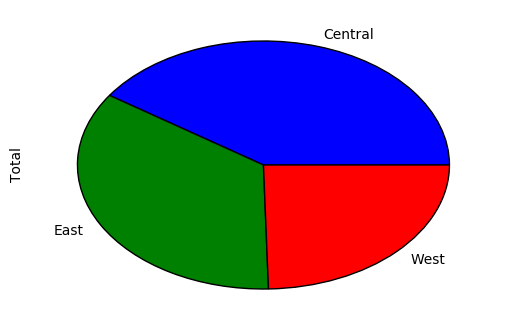

In [82]:
pivot_table.plot(kind='pie')

In [95]:
fig.figure.savefig('graph.png')